Epoch 0, Error: 0.250072
Epoch 1000, Error: 0.212281
Epoch 2000, Error: 0.131018
Epoch 3000, Error: 0.009787
Epoch 4000, Error: 0.003916
Epoch 5000, Error: 0.002367
Epoch 6000, Error: 0.001677
Epoch 7000, Error: 0.001291
Epoch 8000, Error: 0.001046
Epoch 9000, Error: 0.000877

Final Results:
Input -> Target | Predicted -> Rounded
----------------------------------------
[0 0] -> 0    | 0.0245 -> 0
[0 1] -> 1    | 0.9714 -> 1
[1 0] -> 1    | 0.9713 -> 1
[1 1] -> 0    | 0.0278 -> 0

Accuracy: 100.0%


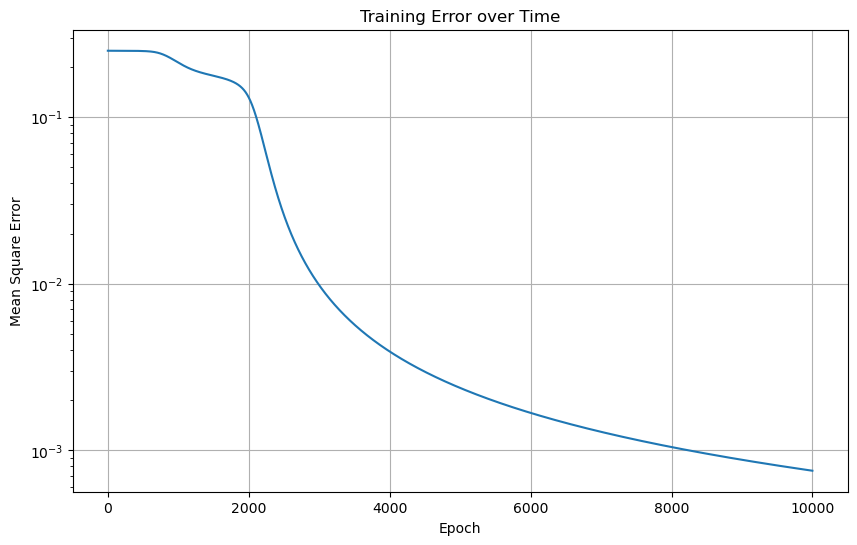


Learned weights:
Input to Hidden: 
[[ 4.35292097 -6.27210776]
 [ 4.35978913 -6.31178715]]
Hidden to Output: 
[[-9.16343556]
 [-8.84069999]]
Hidden bias: 
[[-6.77623372  2.43290348]]
Output bias: 
[[4.45493794]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

class XORNeuralNetwork:
    def __init__(self, learning_rate=0.5):
        self.learning_rate = learning_rate

        self.weights_input_hidden = np.random.uniform(-1, 1, (2, 2))  
        self.weights_hidden_output = np.random.uniform(-1, 1, (2, 1)) 

        self.bias_hidden = np.random.uniform(-1, 1, (1, 2)) 
        self.bias_output = np.random.uniform(-1, 1, (1, 1)) 

        self.error_history = []

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_pass(self, x):
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_input)

        return self.predicted_output

    def backward_pass(self, x, y, predicted_output):
        m = x.shape[0]

        output_error = y - predicted_output
        output_delta = output_error * self.sigmoid_derivative(predicted_output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += (self.hidden_output.T.dot(output_delta)) * self.learning_rate / m
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate / m

        self.weights_input_hidden += (x.T.dot(hidden_delta)) * self.learning_rate / m
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate / m

    def train(self, X, y, epochs=10000, print_every=1000):
        for epoch in range(epochs):
            predicted_output = self.forward_pass(X)

            mse = np.mean((y - predicted_output) ** 2)
            self.error_history.append(mse)

            self.backward_pass(X, y, predicted_output)

            if epoch % print_every == 0:
                print(f"Epoch {epoch}, Error: {mse:.6f}")

    def predict(self, X):
        return self.forward_pass(X)

    def print_results(self, X, y):
        predictions = self.predict(X)
        print("\nFinal Results:")
        print("Input -> Target | Predicted -> Rounded")
        print('-' * 40)
        for i in range(len(X)):
            predicted_val = predictions[i][0]
            rounded_val = round(predicted_val)
            print(f"{X[i]} -> {y[i][0]:.0f}    | {predicted_val:.4f} -> {rounded_val}")

        rounded_predictions = np.round(predictions)
        accuracy = np.mean(rounded_predictions == y) * 100
        print(f"\nAccuracy: {accuracy:.1f}%")

def main():
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([[0],
                  [1],
                  [1],
                  [0]])

    nn = XORNeuralNetwork(learning_rate=1.0)
    nn.train(X, y, epochs=10000, print_every=1000)
    nn.print_results(X, y)

    plt.figure(figsize=(10, 6))
    plt.plot(nn.error_history)
    plt.title('Training Error over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    print(f"\nLearned weights:")
    print(f"Input to Hidden: \n{nn.weights_input_hidden}")
    print(f"Hidden to Output: \n{nn.weights_hidden_output}")
    print(f"Hidden bias: \n{nn.bias_hidden}")
    print(f"Output bias: \n{nn.bias_output}")

if __name__ == "__main__":
    main()
